<a href="https://colab.research.google.com/github/morganpatito/Computational-Physics/blob/main/ode/ode_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy Integration Methods

SciPy is a Python library that provides a vast collection of algorithms and tools for scientific computing. It builds upon NumPy, offering advanced functionalities for various scientific and engineering applications.

Key features and capabilities of SciPy include:
* Integration: Routines for numerical integration of functions and solving ordinary differential equations (ODEs).
* Optimization: Algorithms for finding the minimum or maximum of functions, including local and global optimization techniques.
* Interpolation: Tools for estimating values between known data points, including univariate and multivariate interpolation methods.
* Linear Algebra: Advanced linear algebra routines, such as solving linear systems, computing eigenvalues and eigenvectors, and performing singular value decomposition (SVD).
* Signal Processing: Functions for analyzing and manipulating signals, including Fourier transforms, filtering, and windowing.
* Statistics: A comprehensive module for statistical analysis, including probability distributions, hypothesis testing, frequency statistics, and correlation functions.
* Special Functions: Implementations of various mathematical special functions, such as Bessel functions, gamma functions, and error functions.

In this tutorial we will focus on SciPy's tools for numerically integrating ODEs.


## Loading the SciPy library

Because the SciPy library is quite extensive (and takes up a lot of memory), its usually a good idea to just load the particular module or function that you will use. In this tutorial we will be using a numerical integration function `solve_ivp()` for solving ODEs. The "ivp" initials stand for "initial value problem," which is the type of problem we are usually intersted in.

Here's the command to load the function:

In [1]:
from scipy.integrate import solve_ivp

## Solving and ODE with solve_ivp() and the RK45 scheme

The built-in numerical integrator in the SciPy library is called `solve_ivp()` which stands for "Solve Initial Value Problem". It offers multiple integration methods for ODEs with different properties. In this tutorial we will explore one of the most widely-used integration methods:  RK45, an adaptive time-step method that uses 4th and 5th order Runge Kutta schemes.

On each timestep, the RK45 method solves the ODE using both a 4th and a 5th order Runge Kutta method. It then calculates the difference between the solutions, call it $\epsilon = |y_{n+1}(RK4) -y_{n+1}(RK5)|$. If $\epsilon > atol + rtol\cdot |y_n|$, then it reduces the time step and recalculates the error. Once the error is within the acceptable tolerance, the method advances to the next timestep. It also has a method for expanding the time step when the error is too small. The result is a method that can reduce the size of the timestep when the solution is rapidy changing and increase the timestep when the solution is slowly varying. This approach can vastly speed up the integration while preserving accuracy.


Here's an example of calling `solve_ivp()`:
```
sol = solve_ivp(deriv_sho, (0,tmax), y0, method='RK45', args=params,
    atol=1e-6,rtol=1e-6)
```
Passed parameters for `solve_ivp`:
* `deriv_sho` = our custom derivative function for the simple harmonic oscillator
* `(0,tmax)` = tuple containing the start and end times for the numerical integration
* `y0` = array containing the initial values for each variable
* `method='RK45'` = choose the adaptive time-step, Runge-Kutta 45 scheme.
* `args=params` = array containing parameters to pass to the derivative function. If your derivative function does not take passed parameters, omit this argument.
* `atol=1e-6` = absolute tolerance. The integration scheme tries to keep the **absolute error** between the 4th- and 5th-order Runge Kutta solutions less than `atol`.
* `rtol=1e-6` = relative tolerance. The integration scheme tries to keep the **relative error** between the 4th- and 5th-order Runge Kutta solutions less than `atol`.

Returned value:
* `sol` = an object containing the solution.
    * `sol.t` = times at each integration step
    * `sol.y` = array (1D or 2D) containing solutions for each variable in the system. Each variable is stored as **row** (opposite to what we've been using for our custom integrators). Thus to extract the first variable we can use, for example `x = sol.y[0,:]`. To extract the second variable we could use `v = sol.y[1,:]`, and so on.


### Derivative and Plotting Functions

The following is the Simple Harmonic Oscillator derivative function that we used in the last tutorial.

We also include a plotting function to plot the results and errors obtained from the numerical integration.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#########  SHO Derivative Function  #########
#
# This function returns the derivatives for the Simple Harmoni Oscillator
#      dx/dt = v     dv/dt = -(k/m) x
#
# Passed parameters:
#   t = time
#   y = 1x2 array containing position (x) and velocity (v)
#   m = mass
#   k = spring constant
#
# Returned values:
#   dydt = 1x2 array containing the derivatives dx/dt and dv/dt

def deriv_sho(t, y, m, k):

    # extract variables from y array
    x = y[0]          # position
    v = y[1]          # velocity

    # calculate derivatives
    dxdt = v
    dvdt = -(k/m)*x

    # return derivatives in a numpy array
    return np.array([dxdt, dvdt])



#########  Plot Results  #########
#
# This function plots the results of the numerical integration along with
# the analytic solution and the absolute error
#
# Passed parameters:
#   x      = 1D array containing the numerical solution
#   x_true = 1D array containing the analytic solution
#   t      = 1D array containing the times
#   title  = text string containing a message to print for the title
#   style  = style for plotting, default valus is to connect data points
#            with a straight line. This parameter is optional
#
# Returned values:
#   none
#
# Action:
#   top plot:    plot of numerical solution vs time overlayed with the analytic solution
#   lower plot:  error between numerical and analytic solutions
#
def plot_solution(x, x_true, t, title, style="-"):

    err = np.abs(x-x_true)     # calculate numerical error

    #########  Plot Solution  #########

    plt.subplot(2,1,1)                           # upper subplot
    plt.plot(t, x, style, label='Numerical')            # plot position
    plt.plot(t, x_true, '--', label='Analytic')  # analytic solution

    plt.xlabel('t')            # label the x and y axes
    plt.ylabel('x')
    plt.title(title)           # give the plot a title
    plt.legend()               # display the legend

    #########  Plot Error  #########

    plt.subplot(2,1,2)         # lower subplot
    plt.plot(t, err, style)           # plot position
    plt.xlabel('t')            # label the x and y axes
    plt.ylabel('error')

    plt.show()                       # display the plot

### solve_ivp() solution to the S.H.O.

We'll now use the `solve_ivp()` command to solve the simple harmonic oscillator ODE.
* We set the relative and absolute tolerances to  `rtol=1e-3` and `atol=1e-4` respectively.
Run the following Code Cell to see the results.


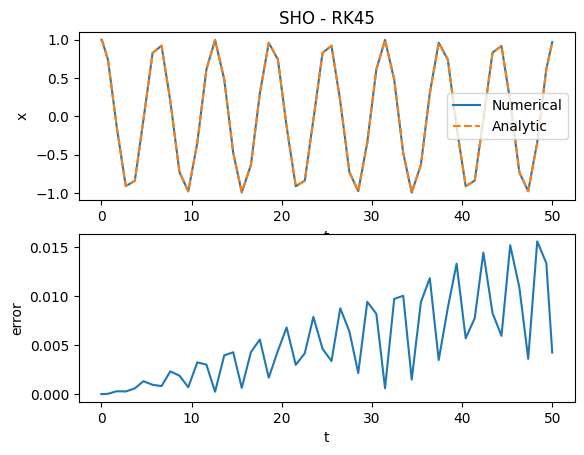

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0   = 0         # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together

#########  Perform RK45 Integration  #########

sol = solve_ivp(deriv_sho, (0,tmax), y0, method='RK45', args=params,
    atol=1e-4,rtol=1e-3)
t = sol.t            # extract times
x = sol.y[0,:]       # extract positions
v = sol.y[1,:]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - RK45")



After running the above code, you may notice that the solution looks jagged, with sharp angles. You may also notice that the numerical solution appears to overlay the analytic solution well (i.e. they are on top of each other). So the question is:  **Did the RK45 integrator do a good job of solving our ODE?**

The jagged appearance is due to the fact that the adaptive time step algorithm is able to use pretty large time steps and still produce an error less than 0.015 over 8 periods. Because we chose to connect the data points with straight line segments, we get a jagged graph (normally, the time step is so small we don't notice this effect).

In otherwords, there are two separate effects:
* **Accuracy** - how well the numercial solution tracks the true solution
* **Sampling** - how often we sample the solution effects the apperance of the graph.
In the graph above, the accuracy is decent (less than the thickness of the line used for the graph), but the sampling is infrequent so we get a jagged graph.

So, back to our question:  Did the RK45 integrator do a good job of solving our ODE?
* The error between the numerical solution and the analytic solution is around 1.5% of the oscillation's amplitude. This error could be reduced by imposing stricter tolerances.
* The plotted solution looks worse than it is because of poor sampling. We will show ways to use the numerical results to "fill out" the full curve using interpolation below.




### ✅ Skill Check 1

We can better visualize the effect of sampling by re-plotting the solution using filled circles to mark the data points instead of line segments (the analytic solution will still use a dashed line). We pass the `'o'` optional parameter to our `plot_solution()` function. Run the following Code Cell:

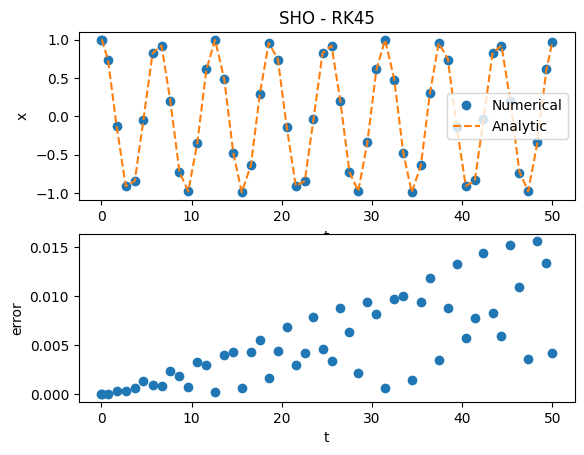

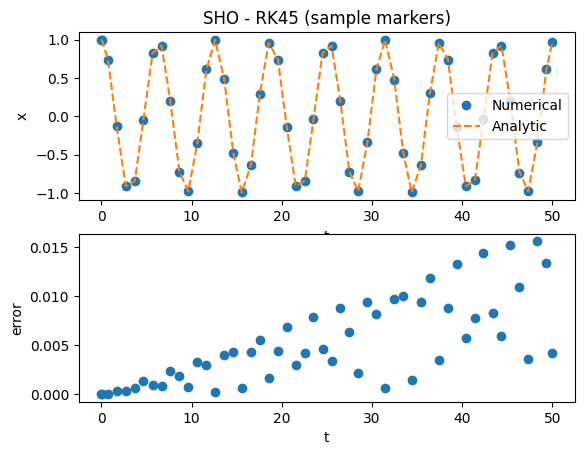

Observation: The numerical points are plotted as circles.
Because solve_ivp used adaptive timesteps points are nonuniformly spaced 
connecting them as straight lines makes the signal appear jagged, but
the analytic curve is smooth. The jagged look is a sampling effect and not a large error.


In [7]:
plot_solution(x, x_true, t, "SHO - RK45",'o')
# Cell 3: Skill Check 1 - show sampling by plotting markers
# (assumes you ran the previous cell and have t, x, x_true available)

plot_solution(x, x_true, t, "SHO - RK45 (sample markers)", style='o')

# Brief printed observation:
print("Observation: The numerical points are plotted as circles.")
print("Because solve_ivp used adaptive timesteps points are nonuniformly spaced ")
print("connecting them as straight lines makes the signal appear jagged, but")
print("the analytic curve is smooth. The jagged look is a sampling effect and not a large error.")



What do you notice?

Your answer here

### ✅ Skill Check 2

Below is a copy of the RK45 code from above. Play around with the relative and absolute tolerances. Can you get the resulting error graphed in the plot to be less than $10^{-9}$? Remember, the `atol` and `rtol` arguments only set the tolerance error between the 4th and 5th order Runge Kutta solutions, not with the actual, analytic solution. How does adjusting the tolerances affect the appearance of the solution?

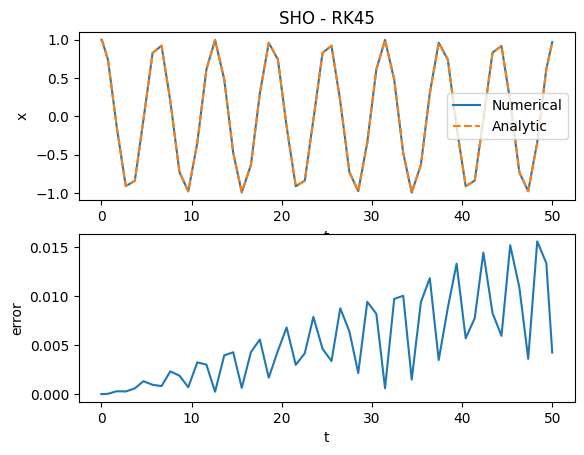

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0   = 0         # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together

#########  Perform RK45 Integration  #########

sol = solve_ivp(deriv_sho, (0,tmax), y0, method='RK45', args=params,
    atol=1e-4,rtol=1e-3)
t = sol.t            # extract times
x = sol.y[0,:]       # extract positions
v = sol.y[1,:]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - RK45")



## Custom Evaluation Times

Adaptive timestep methods produce solutions at nonuniform times. If you want to generate a solution on uniformly spaced times, you have two options:
* option 1:  Pass an optional array of times to the `solve_ivp()` function. This option modifies the time-stepping algorithm to include the specified times
* option 2:  Turn on the `dense_output` option. This option does not affect the numerical integration, but rather allows the user to use interpolation to evaluate the solution at any time they want.
We'll give exaples of each method.

### 🔆 Example:  Specify an array of times to solve_ivp()

Method:
* Define an array of times to evaluation the solution. In the following example, we'll use 300 data points evenly distributed between 0 and `tmax`
* Pass the array to `solve_ivp()` using the `t_eval` option
We'll assume you ran the preceeding code, so will just run the `solve_ivp()` command:

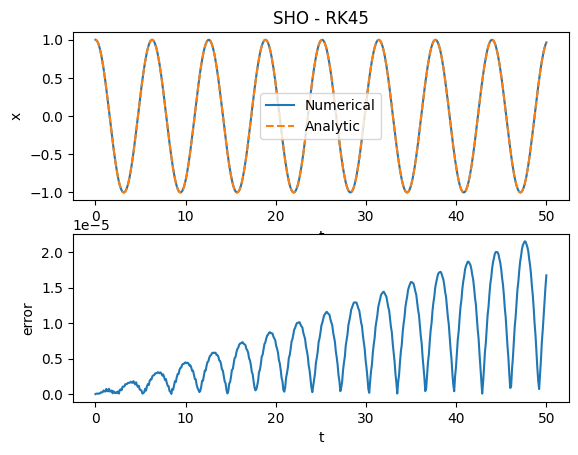

In [9]:


#########  Perform RK45 Integration  #########

times = np.linspace(0,tmax,500)
sol = solve_ivp(deriv_sho, (0,tmax), y0, method='RK45', t_eval=times,
    args=params, atol=1e-6,rtol=1e-6)
t = sol.t            # extract times
x = sol.y[0,:]       # extract positions
v = sol.y[1,:]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - RK45")



### 🔆 Example:  Use dense output to interpolate solution after integration

Method:
* Turn on the `dense_output` flag in `solve_ivp()`
* Use the `sol.sol` object to interpolate the solution onto a regularly spaced array of time values
* Once you extract the solution array `y`, you'll need to extract the particular variable of interest as usual.

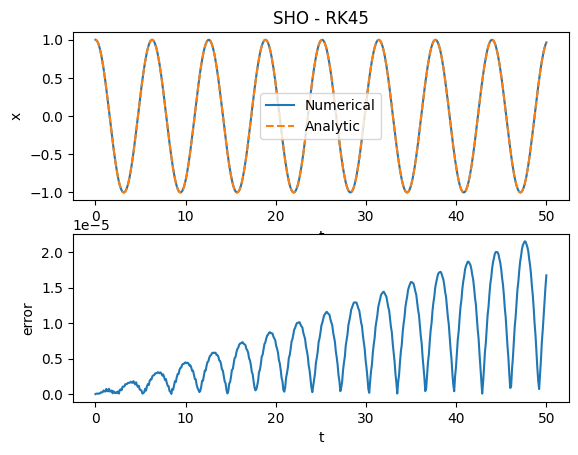

In [10]:


#########  Perform RK45 Integration  #########

sol = solve_ivp(deriv_sho, (0,tmax), y0, method='RK45', dense_output=True,
    args=params, atol=1e-6,rtol=1e-6)

# Extract solution on a regular grid of time values
t = np.linspace(0, tmax, 500)      # define time array
y = sol.sol(t)                     # create a 2D solution array
x = y[0,:]                         # extract position from the solution array

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - RK45")



## Application:  Chaos and the Lorentz Attractor

Chaotic dynamical systems are deterministic systems whose behavior is highly sensitive to initial conditions, leading to outcomes that appear random. Often referred to as the "butterfly effect," this sensitivity means that even tiny differences in the starting point of the system will result in vastly different trajectories over time, making long-term, precise prediction impossible. Despite their unpredictable nature, these systems can exhibit hidden patterns, self-similarity and structure, often involving fractals and strange attractors.

The most widely studied chaotic system is the Lorenz system. It was first studied by Edward lorenz, Ellen Fetter and Margaret Hamilton in 1963 to model atmospheric convection in weather systems. The system consists of three coupled ODEs:
$$\frac{dx}{dt}=\sigma (y-x) $$
$$\frac{dy}{dt}=x (r - z) -y$$
$$\frac{dz}{dt}=x y -b z$$

where $x$, $y$ and $z$ are dimennsionless variables proportional to atmospheric quantities.

System parameters showing their standard values for chaotic dynamics:
* $\sigma = 10$
* $r = 28$
* $b = 8/3$

The dyanamics of the system change dramatically as the parameter $r$ is changed.

In the following Skill Checks, you will explore the dynamics of the Lorenz system through numerical integration.



### ✅ Skill Check 3

Write some code to numerically integrate the Lorenz system.

For each of the values of $r$ given below, use your code to explore the dynamics of the Lorentz system, assuming $\sigma = 10$ and $b=8/3$.
* $r=10$
* $r=22$
* $r=24.5$
* $r=28$
* $r= 100$

In each case do the following:
* plot $x(t), \, y(t), \, z(t)$ for $0\leq t \leq 50$. Give your plot a title including the value of $r$.
* Plot the trajectory of the system in a 3D plot $(x,y,z)$ space. You can either Google/ChatGPT how to do this or look at the example in Python Tutorial 11. Give your plot a title including the value of $r$.
* Categorize how the system behaves using the following categories:  stable fixed point, limit cycle (i.e.oscillations), transient chaos, and chaos. (see the lecture notes for details).
* bonus:  You might want to see if the dynamics depend on the initial conditions that you choose. Also, if it looks like the system has transients, consider plotting the dynamics after the transients die out.

hint: You might consider placing your code in a function that calculates and plots the graphs. If you pass the value $r$ to your function, you can use your same function to produce the plots for each $r$ value (this will save you from making multiple copies of your code.)




=== Lorenz system: r = 10 ===


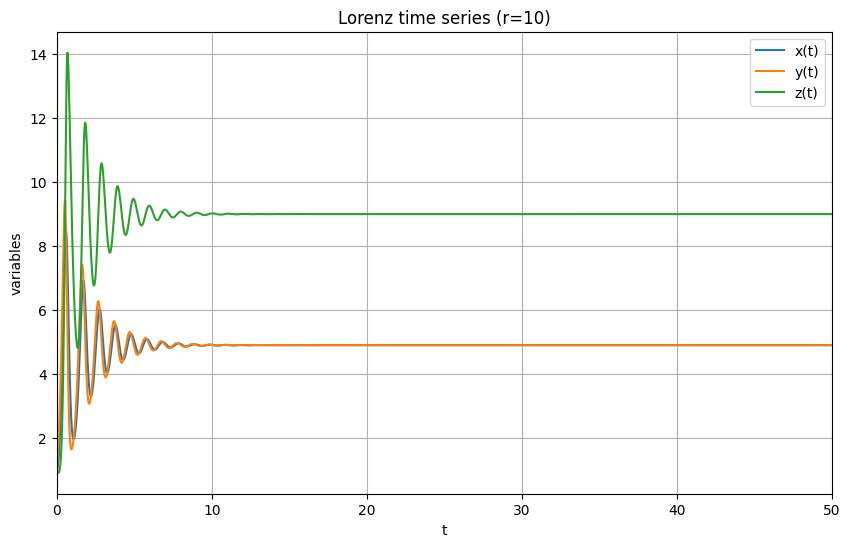

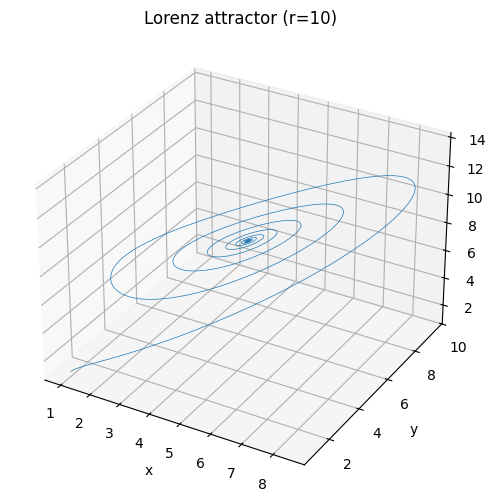

std(x,y,z) after t>tmax/2: [0. 0. 0.]
FFT peak ratio (x): 51.011
Suggested classification (heuristic): stable fixed point

=== Lorenz system: r = 22 ===


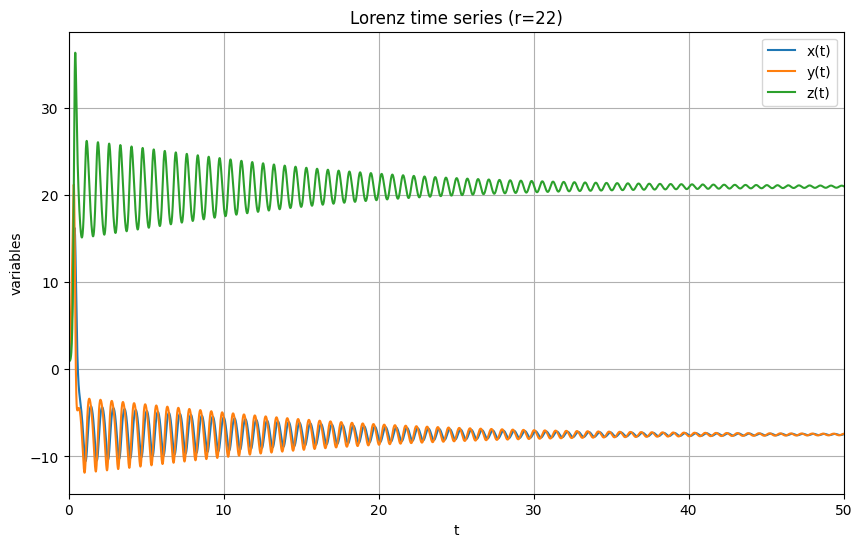

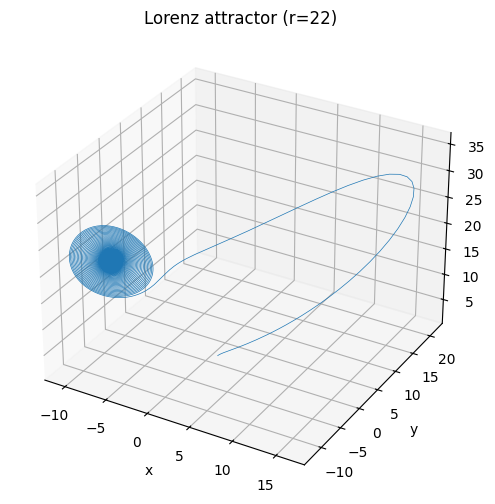

std(x,y,z) after t>tmax/2: [0.1941 0.2613 0.3382]
FFT peak ratio (x): 177.601
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 24.5 ===


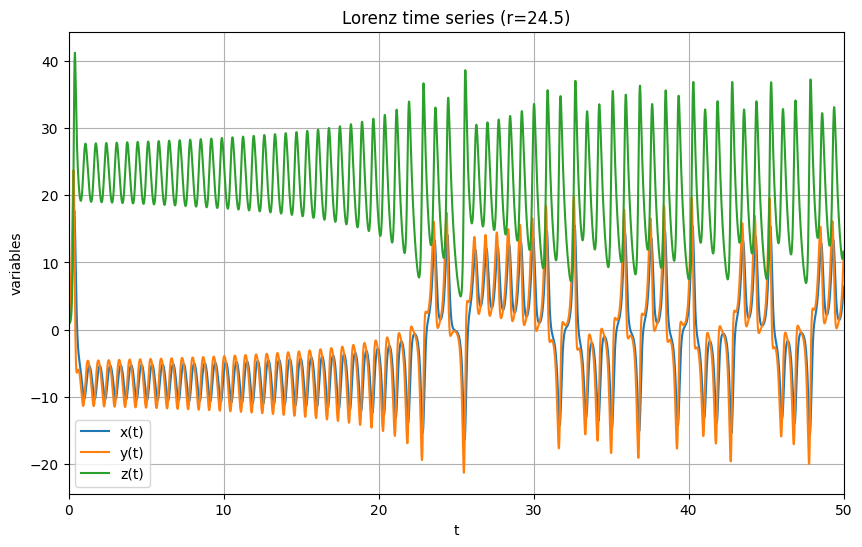

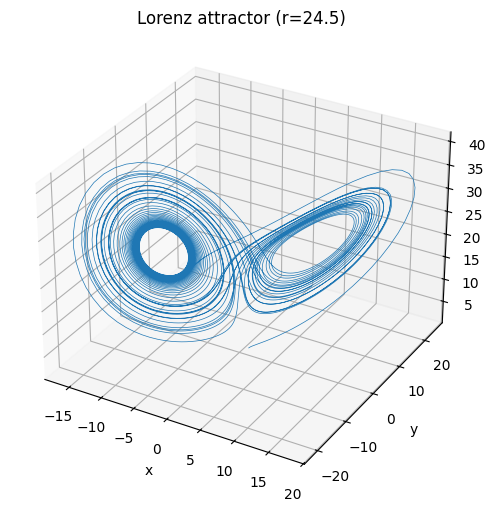

std(x,y,z) after t>tmax/2: [7.2255 8.1973 8.1378]
FFT peak ratio (x): 50.252
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 28 ===


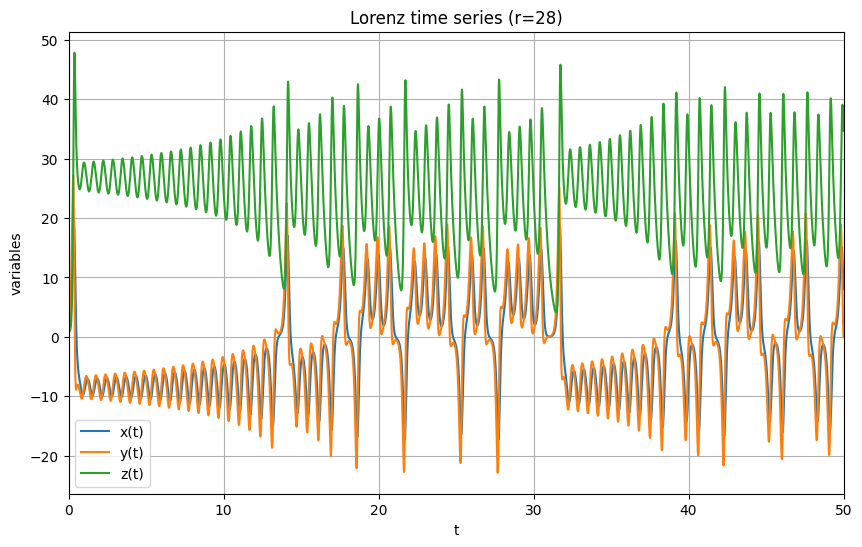

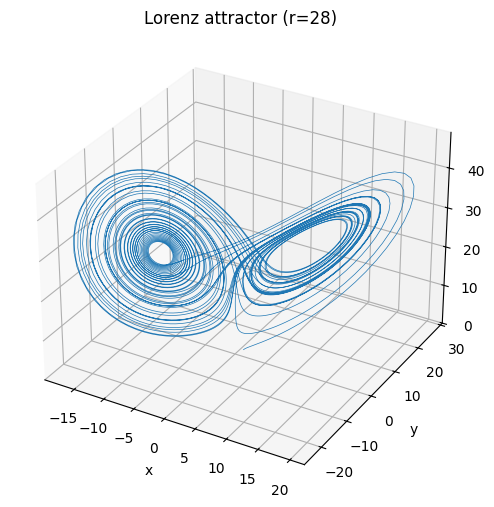

std(x,y,z) after t>tmax/2: [7.9478 9.0192 8.5745]
FFT peak ratio (x): 64.398
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 100 ===


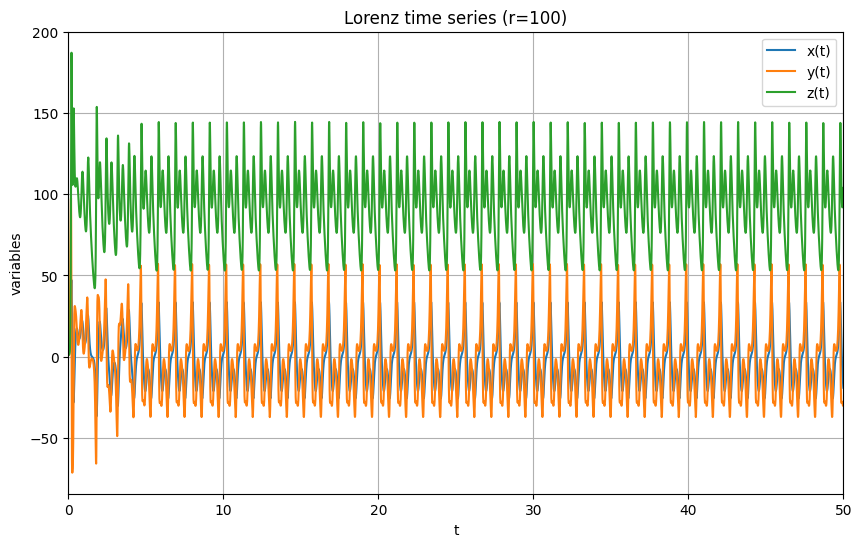

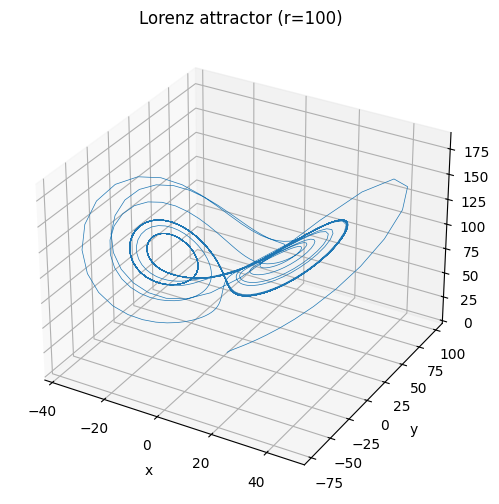

std(x,y,z) after t>tmax/2: [15.1061 22.4851 22.2493]
FFT peak ratio (x): 165.105
Suggested classification (heuristic): limit cycle / periodic


In [12]:


# your code here


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection

def deriv_lorenz(t, y, sigma, r, b):
    x, yv, z = y
    dxdt = sigma * (yv - x)
    dydt = x * (r - z) - yv
    dzdt = x * yv - b * z
    return np.array([dxdt, dydt, dzdt])

def analyze_and_plot_lorenz(r, sigma=10.0, b=8/3, tmax=50.0, y0=(1.0,1.0,1.0)):
    print(f"\n=== Lorenz system: r = {r} ===")
    t_span = (0.0, tmax)
    t_eval = np.linspace(0, tmax, 5000)
    sol = solve_ivp(deriv_lorenz, t_span, np.array(y0), args=(sigma, r, b),
                    t_eval=t_eval, rtol=1e-9, atol=1e-12)
    t = sol.t
    X = sol.y  # shape (3, Nt)
    x = X[0,:]; yv = X[1,:]; z = X[2,:]

    # Plot time series
    plt.figure(figsize=(10,6))
    plt.plot(t, x, label='x(t)')
    plt.plot(t, yv, label='y(t)')
    plt.plot(t, z, label='z(t)')
    plt.xlim(0, tmax)
    plt.xlabel('t'); plt.ylabel('variables'); plt.title(f'Lorenz time series (r={r})')
    plt.legend(); plt.grid(True); plt.show()

    # 3D trajectory
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, yv, z, lw=0.5)
    ax.set_title(f'Lorenz attractor (r={r})'); ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    plt.show()

    # Simple classification heuristic:
    # - compute std of each series after transient (t > tmax*0.5)
    cut = int(len(t) * 0.5)
    stds = np.std(X[:,cut:], axis=1)
    # FFT peakiness check for x(t) after transient (detect clear dominant frequency)
    from numpy.fft import rfft, rfftfreq
    x_cut = x[cut:]
    yf = np.abs(rfft(x_cut - np.mean(x_cut)))
    freqs = rfftfreq(x_cut.size, d=(t[1]-t[0]))
    # find relative peak dominance
    if yf.size > 3:
        peak_ratio = np.max(yf) / (np.mean(yf) + 1e-16)
    else:
        peak_ratio = 0.0

    print("std(x,y,z) after t>tmax/2:", np.round(stds, 4))
    print("FFT peak ratio (x):", np.round(peak_ratio, 3))

    # Heuristic classification
    if np.all(stds < 0.01):
        classification = "stable fixed point"
    elif peak_ratio > 10.0:
        classification = "limit cycle / periodic"
    else:
        classification = "chaotic or complex (transient/chaos)"
    print("Suggested classification (heuristic):", classification)

# Run for specified r values
r_values = [10, 22, 24.5, 28, 100]
for r in r_values:
    analyze_and_plot_lorenz(r)





### ✅ Skill Check 4

In this Skill Check, you will explore how sensitive the Lorenz system is to initial conditions. We will see how the evolution of the system changes when the starting location is changed by a small amount.

Specs:
* Create a panel of four subplots.
* On each subplot graph $x(t)$ for $9 \leq t \leq 50$ and overlay a second solution in which the initial condition differs from the first by a small amount $\Delta x$.
* The 4 subplots should have the following values of $\Delta x$: $10^{-3}, \, 10^{-6}, \, 10^{-12}, \, 10^{-12}$.
* Label your subplots with the value $\Delta x$.
* For each of the $\Delta x$ values, estimate the time at which the trajectories start to visibly diverge from each other on the plots.
* These plots show that if you improve your accuracy $\Delta x$ of the initial conditions, you can predict the system behavior farther into the future (but not much farther). Comparing the $\Delta x=10^{-3}$ case to the $10^{-12}$ case, the accuracy is improved by a factor of a billion ($10^9$). By what factor does the time prediction improve?

This example illustrates why it is practically impossible to predict chaotic systems (such as the weather) very far into the future.



=== Lorenz system: r = 10 ===


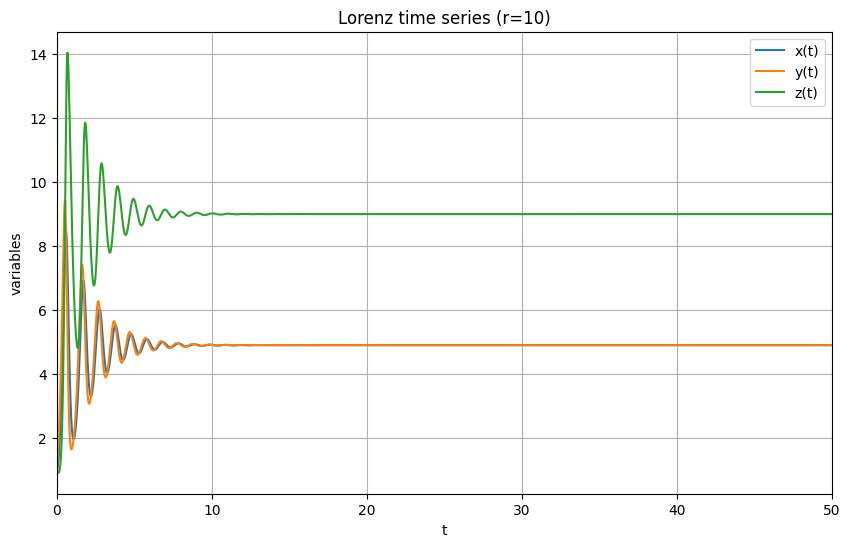

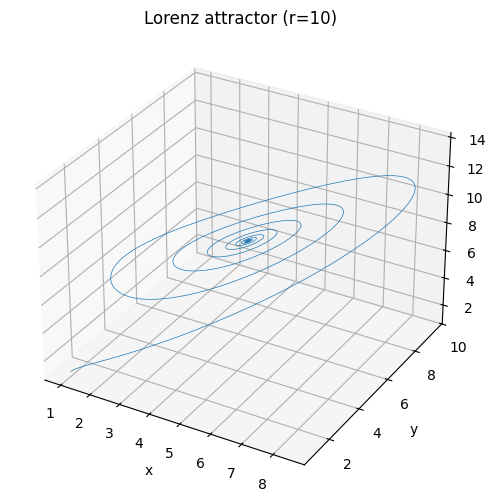

std(x,y,z) after t>tmax/2: [0. 0. 0.]
FFT peak ratio (x): 51.011
Suggested classification (heuristic): stable fixed point

=== Lorenz system: r = 22 ===


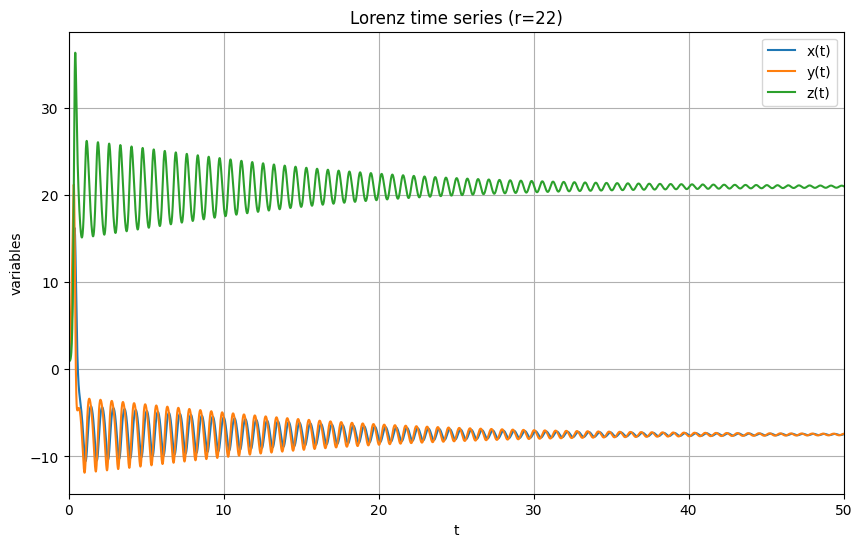

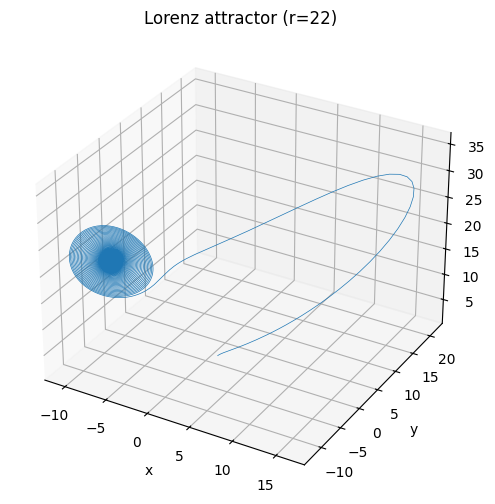

std(x,y,z) after t>tmax/2: [0.1941 0.2613 0.3382]
FFT peak ratio (x): 177.601
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 24.5 ===


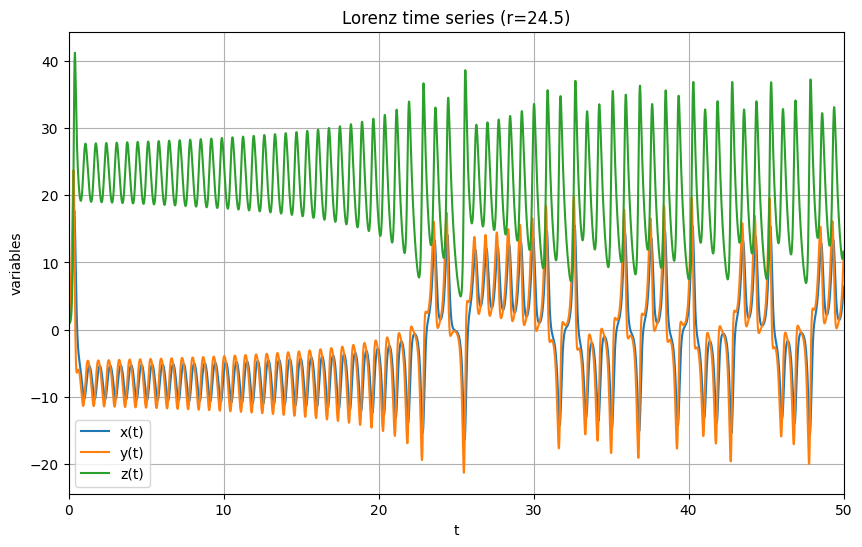

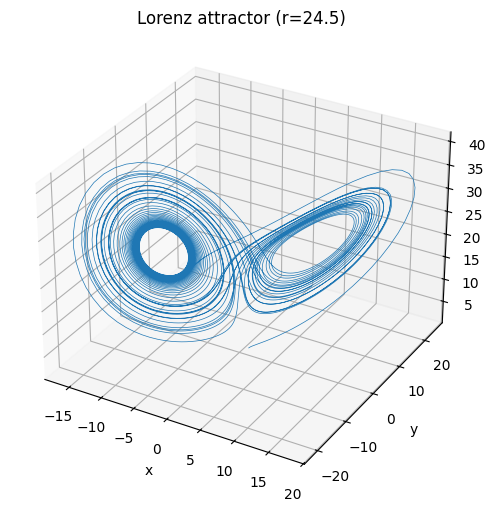

std(x,y,z) after t>tmax/2: [7.2255 8.1973 8.1378]
FFT peak ratio (x): 50.252
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 28 ===


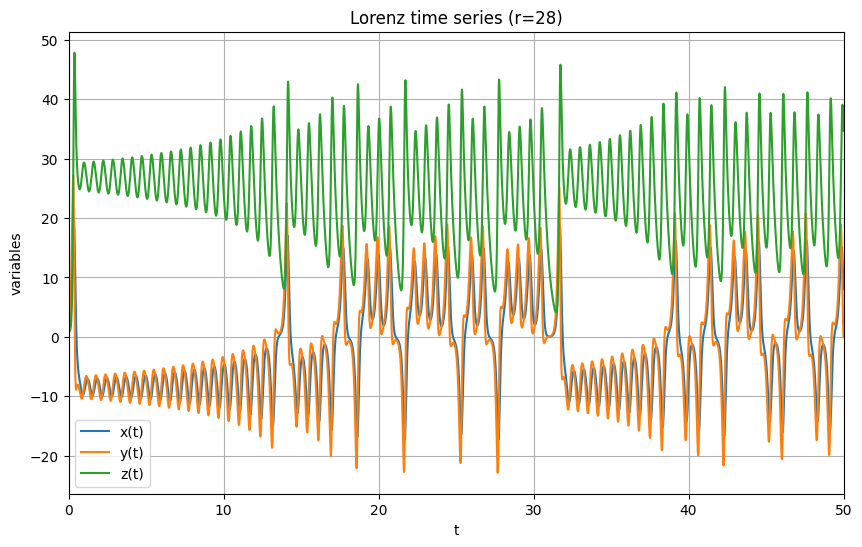

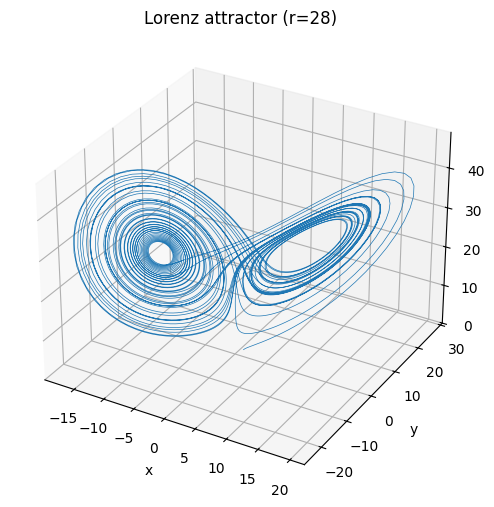

std(x,y,z) after t>tmax/2: [7.9478 9.0192 8.5745]
FFT peak ratio (x): 64.398
Suggested classification (heuristic): limit cycle / periodic

=== Lorenz system: r = 100 ===


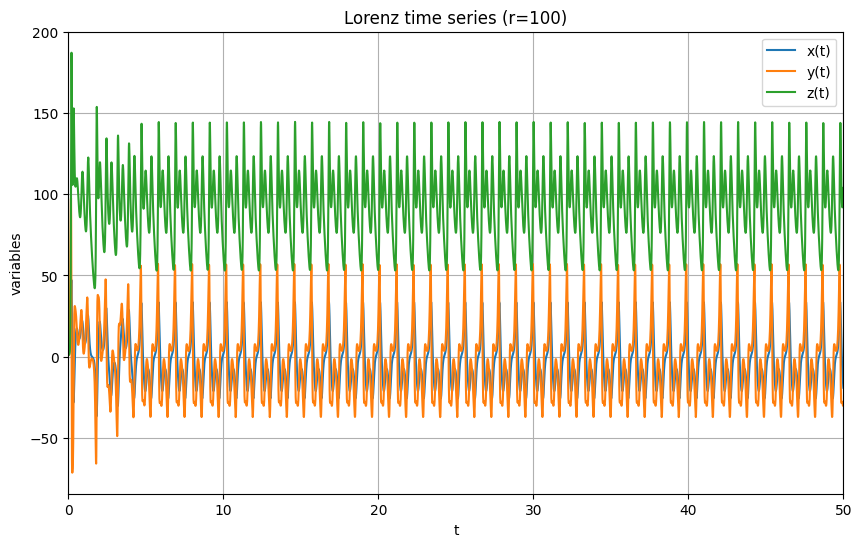

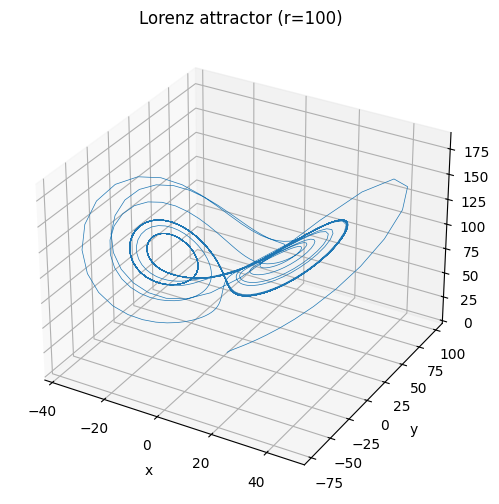

std(x,y,z) after t>tmax/2: [15.1061 22.4851 22.2493]
FFT peak ratio (x): 165.105
Suggested classification (heuristic): limit cycle / periodic


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# your code here

# Cell 7: Skill Check 3 - Lorenz system integration, time series and 3D plots
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection

def deriv_lorenz(t, y, sigma, r, b):
    x, yv, z = y
    dxdt = sigma * (yv - x)
    dydt = x * (r - z) - yv
    dzdt = x * yv - b * z
    return np.array([dxdt, dydt, dzdt])

def analyze_and_plot_lorenz(r, sigma=10.0, b=8/3, tmax=50.0, y0=(1.0,1.0,1.0)):
    print(f"\n=== Lorenz system: r = {r} ===")
    t_span = (0.0, tmax)
    t_eval = np.linspace(0, tmax, 5000)
    sol = solve_ivp(deriv_lorenz, t_span, np.array(y0), args=(sigma, r, b),
                    t_eval=t_eval, rtol=1e-9, atol=1e-12)
    t = sol.t
    X = sol.y  # shape (3, Nt)
    x = X[0,:]; yv = X[1,:]; z = X[2,:]

    # Plot time series
    plt.figure(figsize=(10,6))
    plt.plot(t, x, label='x(t)')
    plt.plot(t, yv, label='y(t)')
    plt.plot(t, z, label='z(t)')
    plt.xlim(0, tmax)
    plt.xlabel('t'); plt.ylabel('variables'); plt.title(f'Lorenz time series (r={r})')
    plt.legend(); plt.grid(True); plt.show()

    # 3D trajectory
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, yv, z, lw=0.5)
    ax.set_title(f'Lorenz attractor (r={r})'); ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    plt.show()

    # Simple classification heuristic:
    # - compute std of each series after transient (t > tmax*0.5)
    cut = int(len(t) * 0.5)
    stds = np.std(X[:,cut:], axis=1)
    # FFT peakiness check for x(t) after transient (detect clear dominant frequency)
    from numpy.fft import rfft, rfftfreq
    x_cut = x[cut:]
    yf = np.abs(rfft(x_cut - np.mean(x_cut)))
    freqs = rfftfreq(x_cut.size, d=(t[1]-t[0]))
    # find relative peak dominance
    if yf.size > 3:
        peak_ratio = np.max(yf) / (np.mean(yf) + 1e-16)
    else:
        peak_ratio = 0.0

    print("std(x,y,z) after t>tmax/2:", np.round(stds, 4))
    print("FFT peak ratio (x):", np.round(peak_ratio, 3))

    # Heuristic classification
    if np.all(stds < 0.01):
        classification = "stable fixed point"
    elif peak_ratio > 10.0:
        classification = "limit cycle / periodic"
    else:
        classification = "chaotic or complex (transient/chaos)"
    print("Suggested classification (heuristic):", classification)

# Run for specified r values
r_values = [10, 22, 24.5, 28, 100]
for r in r_values:
    analyze_and_plot_lorenz(r)




### ✅ Skill Check 5

In this Skill Check, you explore how rapidly closely spaced initial conditions diverge from each other in a chaotic system.

Specs:
* Using the standard parameters $r=28$, $b= 8/3$, $\sigma = 10$, calculate the path of the system for $0 \leq t \leq 50$.
* Calculate a second solution where the initial conditions differ from the first by $\Delta z = 10^{-12}$.
* Calculate the distance between these two trajectories as a function of time:
$$d(t) = \sqrt{(x_1(t)-x_2(t))^2 + (y_1(t)-y_2(t))^2 + (z_1(t)-z_2(t))^2}$$.
* Plot the distance vs. time on a log-linear plot.
* You should see that $\log(d)$ increases linearly with time, meaning that the distance between the two trajectories increases exponentially, i.e. $d =c e^{\lambda t}$, where $\lambda$ is the slope in the log-linear plot. The value  $\lambda$ is called the Lyapunov exponent. If the the Lyapunov exponent is positive, it indicates the system is chaotic.
* Repeat these steps for $r=10$ using $\Delta z = 10^{-3}$. Is the system with this $r$ value chaotic?  Focus only on the initial trend in the data (not the longer-term variations).


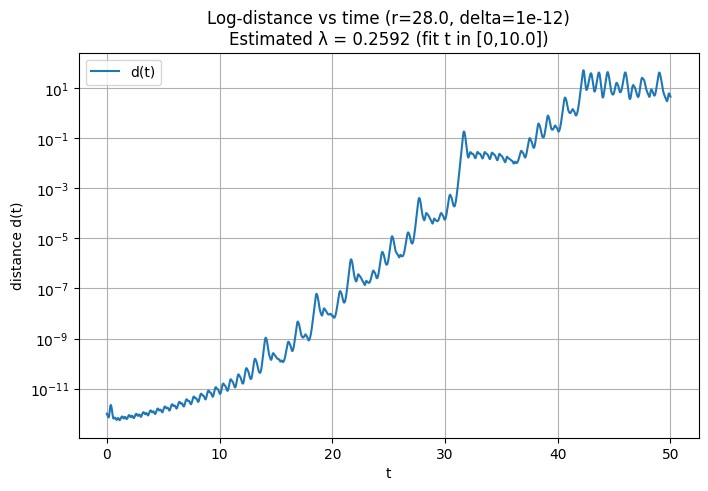

r=28.0, delta=1e-12: estimated Lyapunov exponent λ ≈ 0.2592, fit stderr = 3.2703e-03, r^2 = 0.8630


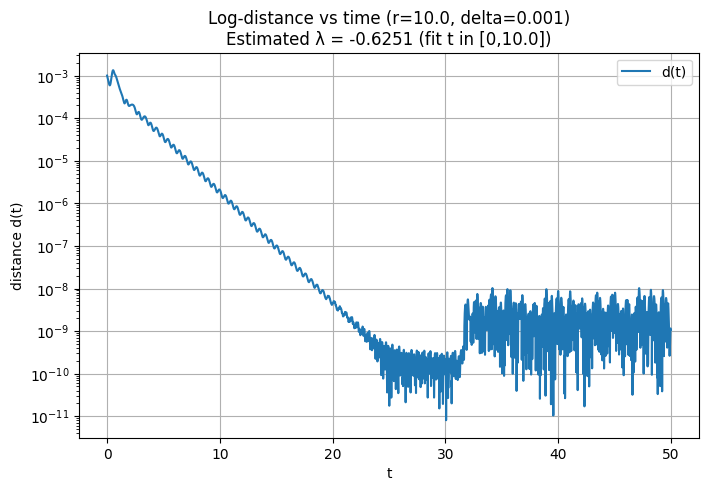

r=10.0, delta=0.001: estimated Lyapunov exponent λ ≈ -0.6251, fit stderr = 2.2183e-03, r^2 = 0.9876

Interpretation:
If λ > 0, trajectories diverge exponentially => chaotic behavior.
If λ <= 0, no exponential divergence.


In [15]:


# your code here

# Cell 9: Skill Check 5 - estimate Lyapunov exponent by fitting log(d(t)) early slope
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import linregress

def estimate_lyapunov(r, delta=1e-12, tmax=50.0):
    sigma = 10.0; b = 8/3
    t_eval = np.linspace(0, tmax, 5000)
    y0 = np.array([1.0, 1.0, 1.0])
    y0p = y0.copy()
    y0p[2] += delta  # perturb z by delta

    sol1 = solve_ivp(deriv_lorenz, (0,tmax), y0, t_eval=t_eval, args=(sigma, r, b), rtol=1e-9, atol=1e-12)
    sol2 = solve_ivp(deriv_lorenz, (0,tmax), y0p, t_eval=t_eval, args=(sigma, r, b), rtol=1e-9, atol=1e-12)

    t = sol1.t
    X1 = sol1.y; X2 = sol2.y
    d = np.sqrt(np.sum((X1 - X2)**2, axis=0))

    # avoid zeros and numerical floor
    d = np.maximum(d, 1e-16)

    # consider an early window to fit exponential growth (e.g., t in [0, Tmax_fit])
    Tmax_fit = 10.0
    mask = (t >= 0) & (t <= Tmax_fit)
    t_fit = t[mask]
    logd = np.log(d[mask])

    # linear fit: logd = log(c) + lambda * t
    slope, intercept, r_value, p_value, stderr = linregress(t_fit, logd)

    # plot
    plt.figure(figsize=(8,5))
    plt.plot(t, d, label='d(t)')
    plt.yscale('log')
    plt.xlabel('t'); plt.ylabel('distance d(t)')
    plt.title(f'Log-distance vs time (r={r}, delta={delta})\nEstimated λ = {slope:.4f} (fit t in [0,{Tmax_fit}])')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"r={r}, delta={delta}: estimated Lyapunov exponent λ ≈ {slope:.4f}, fit stderr = {stderr:.4e}, r^2 = {r_value**2:.4f}")
    return slope, intercept, r_value, stderr

# For r=28, delta=1e-12
lambda28 = estimate_lyapunov(28.0, delta=1e-12, tmax=50.0)

# For r=10, delta=1e-3
lambda10 = estimate_lyapunov(10.0, delta=1e-3, tmax=50.0)

print("\nInterpretation:")
print("If λ > 0, trajectories diverge exponentially => chaotic behavior.")
print("If λ <= 0, no exponential divergence.")



